In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Read file
csv_path = "https://full-stack-assets.s3.eu-west-3.amazonaws.com/Deployment/get_around_pricing_project.csv"
df_pricing = pd.read_csv(csv_path, encoding='utf-8')

print(df_pricing.dtypes)
df = df_pricing.drop(columns=['Unnamed: 0'])

print('Dataset shape:', df_pricing.shape)
print(df_pricing.head())

Unnamed: 0                    int64
model_key                    object
mileage                       int64
engine_power                  int64
fuel                         object
paint_color                  object
car_type                     object
private_parking_available      bool
has_gps                        bool
has_air_conditioning           bool
automatic_car                  bool
has_getaround_connect          bool
has_speed_regulator            bool
winter_tires                   bool
rental_price_per_day          int64
dtype: object
Dataset shape: (4843, 15)
   Unnamed: 0 model_key  mileage  engine_power    fuel paint_color  \
0           0   Citroën   140411           100  diesel       black   
1           1   Citroën    13929           317  petrol        grey   
2           2   Citroën   183297           120  diesel       white   
3           3   Citroën   128035           135  diesel         red   
4           4   Citroën    97097           160  diesel      silver   


In [52]:
print(df_pricing.describe(include='all'))

# Clean a likely index column if present
if 'Unnamed: 0' in df_pricing.columns:
    df_pricing = df_pricing.drop(columns=['Unnamed: 0'])

         Unnamed: 0 model_key       mileage  engine_power    fuel paint_color  \
count   4843.000000      4843  4.843000e+03    4843.00000    4843        4843   
unique          NaN        28           NaN           NaN       4          10   
top             NaN   Citroën           NaN           NaN  diesel       black   
freq            NaN       969           NaN           NaN    4641        1633   
mean    2421.000000       NaN  1.409628e+05     128.98823     NaN         NaN   
std     1398.198007       NaN  6.019674e+04      38.99336     NaN         NaN   
min        0.000000       NaN -6.400000e+01       0.00000     NaN         NaN   
25%     1210.500000       NaN  1.029135e+05     100.00000     NaN         NaN   
50%     2421.000000       NaN  1.410800e+05     120.00000     NaN         NaN   
75%     3631.500000       NaN  1.751955e+05     135.00000     NaN         NaN   
max     4842.000000       NaN  1.000376e+06     423.00000     NaN         NaN   

       car_type private_par

In [53]:
# Check for missing values
print('Missing values per column:')
print(df_pricing.isnull().sum())
print('Dataset shape:', df_pricing.shape)

Missing values per column:
model_key                    0
mileage                      0
engine_power                 0
fuel                         0
paint_color                  0
car_type                     0
private_parking_available    0
has_gps                      0
has_air_conditioning         0
automatic_car                0
has_getaround_connect        0
has_speed_regulator          0
winter_tires                 0
rental_price_per_day         0
dtype: int64
Dataset shape: (4843, 14)


In [54]:
print('Duplicate rows:', df_pricing.duplicated().sum())

Duplicate rows: 0


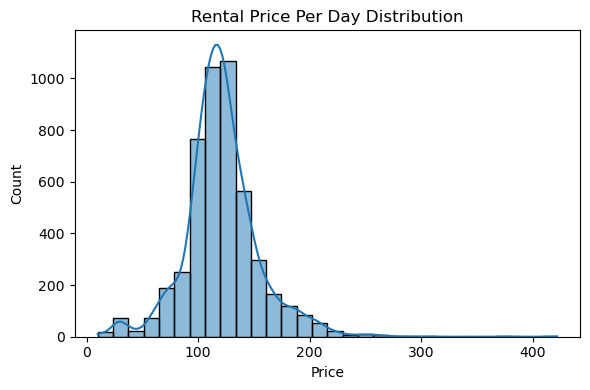

In [55]:
# Plot: rental_price_per_day distribution
plt.figure(figsize=(6,4))
sns.histplot(df_pricing['rental_price_per_day'], bins=30, kde=True)
plt.title('Rental Price Per Day Distribution')
plt.xlabel('Price')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

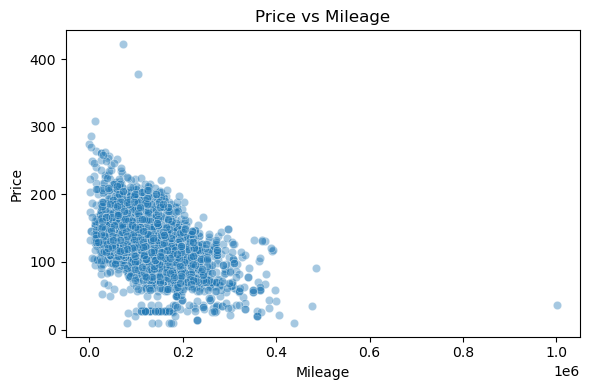

In [56]:
# Plot: Price vs mileage
plt.figure(figsize=(6,4))
sns.scatterplot(data=df_pricing, x='mileage', y='rental_price_per_day', alpha=0.4)
plt.title('Price vs Mileage')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

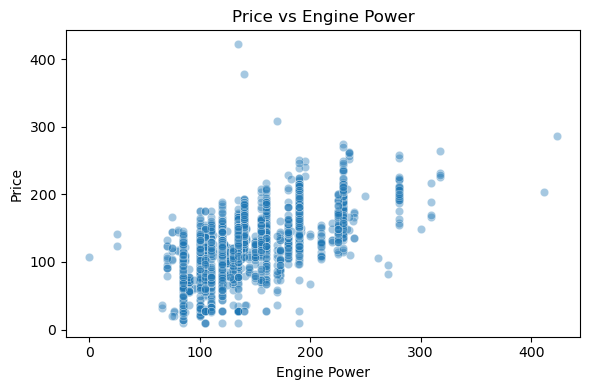

In [57]:
# Plot: Price vs engine_power
plt.figure(figsize=(6,4))
sns.scatterplot(data=df_pricing, x='engine_power', y='rental_price_per_day', alpha=0.4)
plt.title('Price vs Engine Power')
plt.xlabel('Engine Power')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

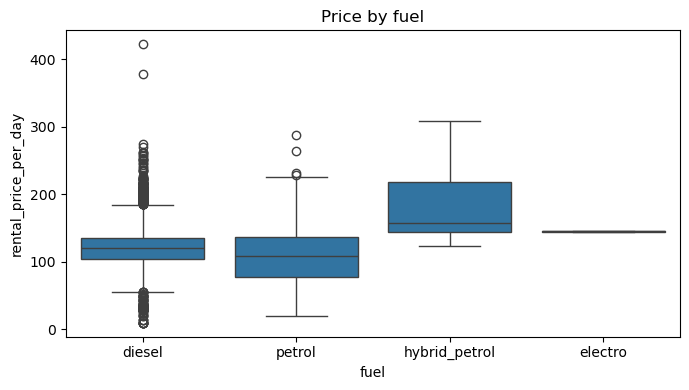

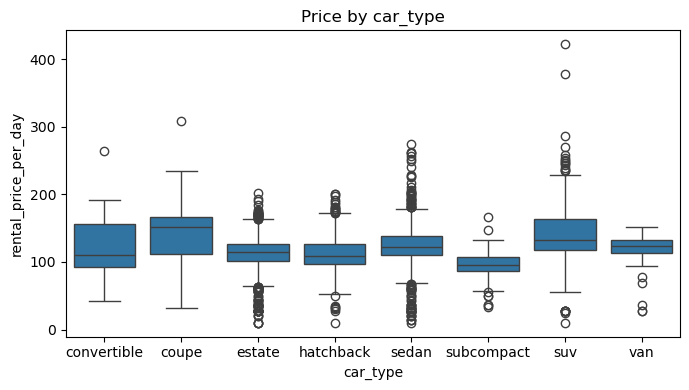

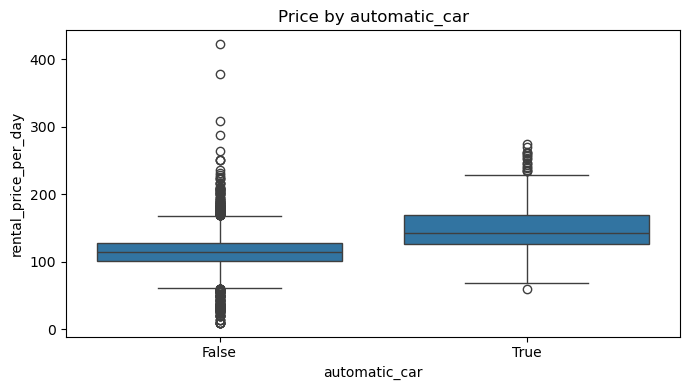

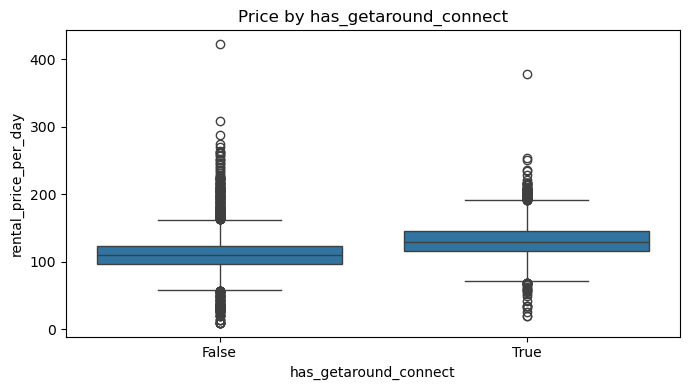

In [58]:
# Categorical: boxplots for a few key features
cats = ['fuel', 'car_type', 'automatic_car', 'has_getaround_connect']
for c in cats:
    if c in df_pricing.columns:
        plt.figure(figsize=(7,4))
        sns.boxplot(data=df_pricing, x=c, y='rental_price_per_day')
        plt.title('Price by ' + c)
        plt.tight_layout()
        plt.show()

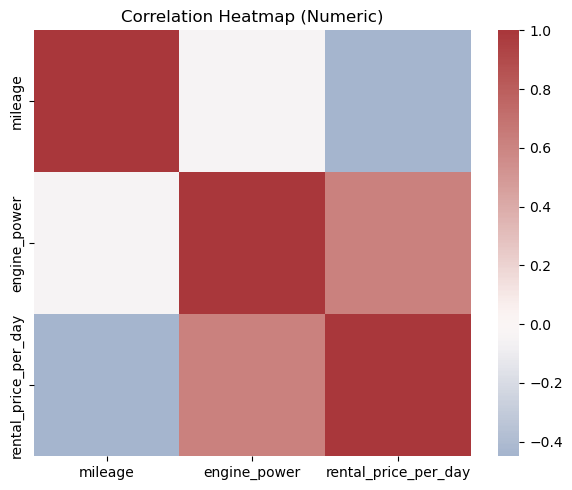

In [59]:
# Quick correlation heatmap for numeric columns
num_cols = df_pricing.select_dtypes(include=[np.number])
plt.figure(figsize=(6,5))
sns.heatmap(num_cols.corr(), annot=False, cmap='vlag', center=0)
plt.title('Correlation Heatmap (Numeric)')
plt.tight_layout()
plt.show()

Les prix sont concentrés vers le bas, avec quelques annonces très chères qui tirent la moyenne vers la droite.
Le kilométrage fait baisser le prix, tandis que la puissance du moteur le fait monter.
Les boîtes automatiques et certains types de voitures (grandes ou haut de gamme) sont plus chères.
Les voitures avec certaines options (comme Getaround Connect) ont en moyenne un prix plus élevé.